In [1]:
#Importing required libraries
import pickle
import numpy as np
import pandas as pd

#Importing filtered dataset
obddata = pd.read_csv("1.csv", index_col=0)
obddata = obddata[obddata['tripID']<20]

# Tyre Radius (Calculation)

In [2]:
"""
Simple formula for calculating the complete tyre radius
"""
#defining function for calculation of car radius
def get_car_radius(nom_sec, aspect_rat, diam):
    rad = nom_sec * aspect_rat * 0.393701 / 1000 + diam / 2
    return rad

# Values Specified 
#   for Honda Jazz :  175, 55, 15
#   for Hyundai i20 : 185, 65, 14
#   for Honda WRV : 195, 60, 16
#   for Redigo : 155, 80 ,13
#   for Hondo City : 175 ,65 , 15

#Calculating car radius for reference of Honda City
car_radius = get_car_radius(175, 65, 15)
print(car_radius)

11.978348875000002


# Total Drive Ratio

The "Total Drive Ratio" (TDR) is a term used in automotive engineering to describe the overall gearing of a vehicle's drivetrain. It represents the combined effect of various gear ratios in the vehicle's transmission and the final drive ratio, which is the gear reduction in the vehicle's differential. The TDR indicates how much the engine's rotational speed (in revolutions per minute, RPM) is reduced before it reaches the vehicle's wheels, resulting in the wheels' rotational speed in relation to the engine speed.

Mathematically, the Total Drive Ratio (TDR) is calculated by multiplying all the individual gear ratios together, along with the final drive ratio:

**TDR = (Gear Ratio_1) * (Gear Ratio_2) * (Gear Ratio_3) * ----- * (Final Drive Ratio)**

Here's what each term represents:

- **Gear Ratio (Gear N):** This represents the ratio of the rotational speed of the engine's output (crankshaft) to the rotational speed of the transmission's output (usually the driveshaft or input to the differential) for a specific gear. Different gears provide different levels of torque and speed to the wheels.

- **Final Drive Ratio:** This is the gear reduction in the vehicle's differential, which further affects the speed and torque delivered to the wheels. It is often a fixed value for a specific vehicle model.

The TDR is crucial in understanding how a vehicle's transmission and differential work together to deliver power and control speed. Different TDR values for different gears allow a vehicle to perform optimally at various speeds and conditions, such as accelerating from a standstill, cruising at highway speeds, or climbing steep hills.

Analyzing the TDR and the relationship between engine RPM and wheel speed can provide insights into a vehicle's performance, fuel efficiency, and overall drivability.

In [3]:
"""
Get the gear ratios from some site online. This task is to be automated. Either get the total drive ratio 
or use the list and map example to get the total drive ratio i.e. tdr from the gear ratios and the final drive
ratio
"""

# Honda Jazz
# gear_rats = [15.29, 8.09, 5.42, 3.95, 3.36] 
# Hyundai i20
# tdr = list(map(lambda x : x * 3, [3.769, 2.045, 1.37, 1.036, 0.893, 0.774]))
# Honda WRV
# tdr = list(map(lambda x : x * 3.85, [3.64, 1.88, 1.18, 0.87, 0.71, 0.59]))
# Datsun ReadiGo :
# tdr = list(map(lambda x : x * 3.85, [3.77,2.05,1.29,0.948,0.79]))
# Honda City :
tdr = list(map(lambda x : x * 4.294, [3.461,1.869,1.235,0.948,0.809]))
print(tdr)

tdr = list(map(lambda x : x * 4.562, [2.995,1.678,1.066,0.760,0.551]))

# tdr = [15.29, 8.09, 5.42, 4.27, 3.55]
print(tdr)

#defining function to calculate ratio
def get_df_ratio_gear_wise(car_radius, gear_rats):
    def getdf_rat(gear_rat):
        return 0.00595 * car_radius / (gear_rat)
    
    df_rats = list(map(getdf_rat, gear_rats))
    return df_rats


df_ratios_ideal = get_df_ratio_gear_wise(car_radius, tdr)
df_ratios_ideal = [1000 * x * 1.60934 for x in df_ratios_ideal]
print(df_ratios_ideal)

[14.861533999999997, 8.025485999999999, 5.30309, 4.070711999999999, 3.473846]
[13.663190000000002, 7.655036, 4.863092000000001, 3.4671200000000004, 2.5136620000000005]
[8.394785849573225, 14.983542085501675, 23.585725721830965, 33.08208370983133, 45.630460289422516]


<IPython.core.display.Javascript object>


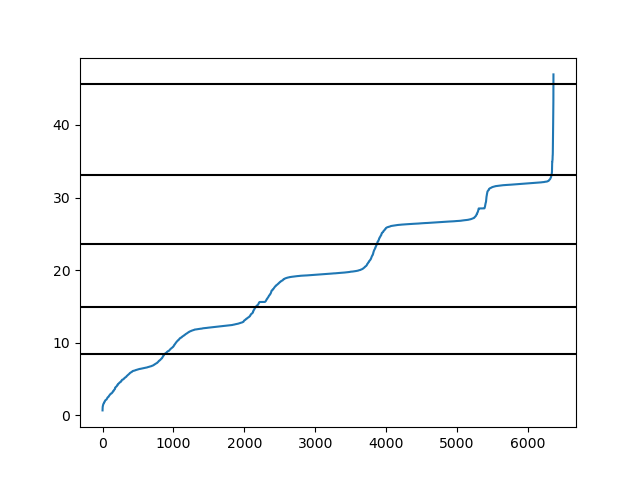

In [4]:
%matplotlib notebook
import matplotlib.pyplot as plt

"""
Calculate the df_ratios for the data points and then apply a filter to remove very high values that may arise
due to some errors or noise or due to division by a very small rpm which we dont care about
"""
df_ratio = pd.DataFrame
df_ratio = obddata['speed'] / obddata['rpm']
df_ratio = df_ratio.fillna(0)
df_ratio = df_ratio[df_ratio != 0]
df_ratio = df_ratio*1000
df_ratio.replace(np.inf, np.nan).fillna(0)
df_ratio[df_ratio > 80] = 0

"""
Sort the ratios to get a better view of the graph
"""

sorted_data = df_ratio.sort_values().reset_index(drop=True)
plt.plot(sorted_data)

#plotting breakline according to threshold
for rat in df_ratios_ideal:
    plt.axhline(y = rat, color = 'black')

**Each horizontal line represents the ideal speed-to-RPM ratio for a specific gear.**